#### Next 5 cells are for running on Google Colab

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from google.colab import drive
import sys

In [21]:
#Mount google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
#Put the folder which contains all relevant code in system path
sys.path.insert(0,'/content/gdrive/MyDrive/ERAV2/S5') #Substitute your folders path over here

In [23]:
%cd /content/gdrive/MyDrive/ERAV2/S5 #Change directory to folder where code resides
%pwd #Print working directory

/content/gdrive/MyDrive/ERAV2/S5


'/content/gdrive/MyDrive/ERAV2/S5'

## Start of actual code

#### The actual model is present in models.py and utility functions in utility.py. These are imported here.

In [16]:
import matplotlib.pyplot as plt

import torch
from torchvision import datasets
import torch.nn.functional as F
import torch.optim as optim

import models
import utils

**CHECK IF CUDA IS AVAIALABLE AND USE IT**

In [17]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cpu')

In [18]:
model = models.Net().to(device) #Call models.py to get the model
summary = utils.get_model_summary(model) #Get summary of the model that has been created
summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


**Get the training and test transformations**

In [19]:
train_transforms = utils.get_transforms(train=True)
test_transforms = utils.get_transforms(train=False)

In [20]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

**Create a wrapper and make an iterator around the data**

In [21]:
batch_size = 512
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

**Plot and visualize data**

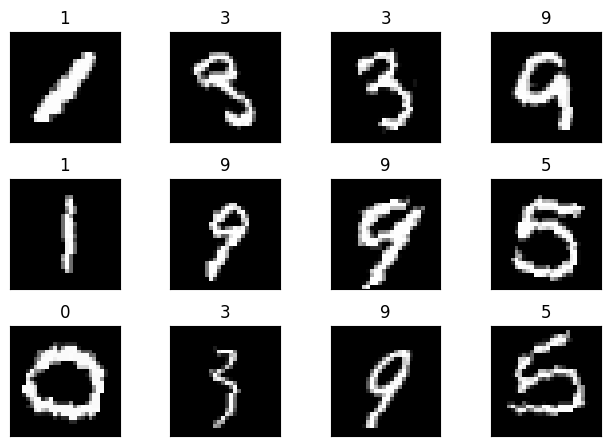

In [22]:
batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

**Create your optimizer and scheduler**

In [23]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) #For adjusting weights post error calculation
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True) #For updating learning rate of optimizer
criterion = F.nll_loss

/Users/vc/.virtualenvs/torch_env/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


#### Run model and calculate loss

In [24]:
epochs = 2
train_losses = []
test_losses = []
train_acc = []
test_acc = []

for epoch in range(1,epochs+1):
    print(f'Epoch {epoch}')
    train_accuracy, train_loss = utils.train(model, device, train_loader, optimizer, criterion)
    train_losses.append(train_loss)
    train_acc.append(train_accuracy)
    test_accuracy, test_loss = utils.test(model, device, test_loader, criterion)
    test_acc.append(test_accuracy)
    test_losses.append(test_loss)
    scheduler.step()

Epoch 1


Train: Loss=0.4544 Batch_id=117 Accuracy=46.67: 100%|██████████| 118/118 [06:07<00:00,  3.11s/it]


Epoch 2


Train: Loss=0.2575 Batch_id=117 Accuracy=93.19: 100%|██████████| 118/118 [04:49<00:00,  2.46s/it]


**Plot training/testing loss and accuracy graphs**

Text(0.5, 1.0, 'Test Accuracy')

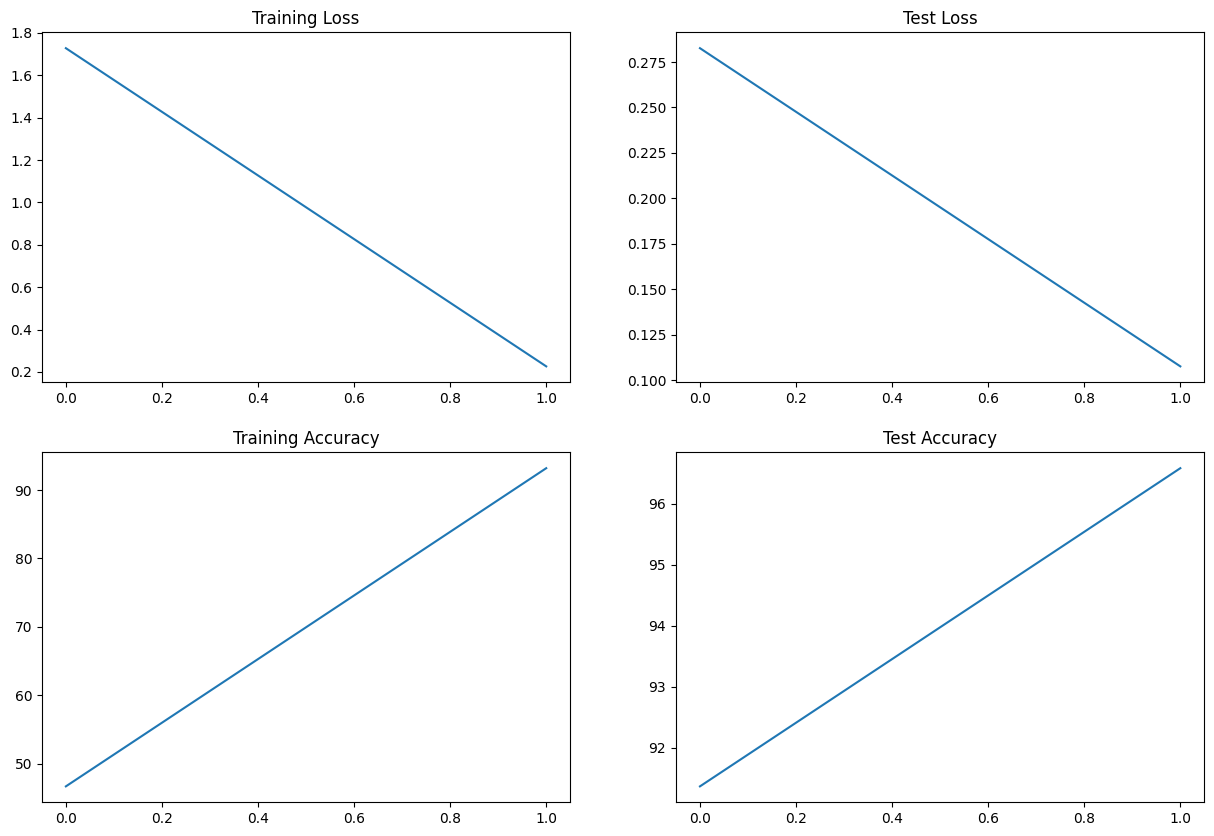

In [25]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")